In [ ]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import ast 
from collections import ChainMap, Counter
import collections
import os # operating system
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
from scipy import stats
import sqlite3
from functools import reduce
from sklearn import preprocessing

import os # operating system
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # standard graphics
import seaborn as sns # fancier graphics
import statsmodels.api as sm
from scipy import stats
import sqlite3
from functools import reduce
from sklearn import preprocessing, datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Set IDE display settings to display data properly 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from google.colab import files
files.upload()

Saving USCensus1990.data.txt to USCensus1990.data.txt


In [ ]:
USCensusDF=pd.read_csv("USCensus1990.data.txt", sep=',')
print(USCensusDF.shape)  

(2458285, 69)


### **1st step. Data Cleaning**

In [ ]:
def describe(df):
    return pd.concat([df.describe().T,                      
                      df.median().rename('median'),
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt')
                     ], axis=1).T

Names=['dAge','dAncstry1','iEnglish','dHispanic','dHours','dIncome1','dPOB','dPoverty','dRearning','dYrsserv']
describe(USCensusDF[Names])

,dAge,dAncstry1,iEnglish,dHispanic,dHours,dIncome1,dPOB,dPoverty,dRearning,dYrsserv
count,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06,2.458285e+06
mean,3.851643e+00,3.299006e+00,2.108714e-01,1.397084e-01,1.395570e+00,8.968769e-01,2.814027e-01,1.828576e+00,1.487712e+00,1.391918e-01
std,2.048492e+00,4.041179e+00,6.489750e-01,8.991438e-01,1.751103e+00,1.094722e+00,9.704363e-01,4.317771e-01,1.546887e+00,4.035386e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
75%,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
max,7.000000e+00,1.100000e+01,4.000000e+00,9.000000e+00,5.000000e+00,4.000000e+00,6.000000e+00,2.000000e+00,5.000000e+00,2.000000e+00
median,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
mad,1.746868e+00,3.311484e+00,3.695622e-01,2.703031e-01,1.577744e+00,9.029044e-01,5.139154e-01,2.916857e-01,1.401856e+00,2.456237e-01


In [ ]:
USCensusDF = pd.read_csv("USCensus1990.data.txt", engine="python")
USCensusDF.drop(index=0, inplace=True)
USCensusDF.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,iFertil,dHispanic,dHour89,dHours,iImmigr,dIncome1,dIncome2,dIncome3,dIncome4,dIncome5,dIncome6,dIncome7,dIncome8,dIndustry,iKorean,iLang1,iLooking,iMarital,iMay75880,iMeans,iMilitary,iMobility,iMobillim,dOccup,iOthrserv,iPerscare,dPOB,dPoverty,dPwgt1,iRagechld,dRearning,iRelat1,iRelat2,iRemplpar,iRiders,iRlabor,iRownchld,dRpincome,iRPOB,iRrelchld,iRspouse,iRvetserv,iSchool,iSept80,iSex,iSubfam1,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
1,10001,6,1,1,0,0,7,5,2,2,0,0,3,0,1,1,0,1,0,0,0,0,1,0,0,4,0,2,0,0,0,1,4,1,2,2,0,2,0,2,2,4,2,1,0,0,1,1,0,2,10,0,1,0,1,0,1,0,0,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,0,0,1,0,4,4,0,1,0,1,0,0,0,0,0,1,0,2,0,4,0,10,4,1,2,4,0,2,0,2,1,4,2,2,0,0,0,1,0,2,10,0,6,0,1,0,1,0,0,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,0,0,3,0,3,3,0,1,0,0,0,0,0,0,1,4,0,2,0,2,0,1,4,1,2,2,0,2,0,2,1,2,2,0,0,0,1,1,0,2,10,0,4,0,1,0,1,0,0,0,1,0,1,1,1,0,10,1,0
4,10004,7,1,1,0,0,0,0,2,2,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,2,0,0,0,4,1,2,0,0,2,0,2,1,4,0,1,0,0,0,6,0,2,22,0,1,0,1,0,1,0,0,3,0,0,0,2,2,0,5,6,0
5,10005,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,0,0,1,0,0,0,0,0,2,0,4,0,2,0,121,0,0,1,0,10,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,4,0,0


In [ ]:
USCensusDF.describe()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,iFertil,dHispanic,dHour89,dHours,iImmigr,dIncome1,dIncome2,dIncome3,dIncome4,dIncome5,dIncome6,dIncome7,dIncome8,dIndustry,iKorean,iLang1,iLooking,iMarital,iMay75880,iMeans,iMilitary,iMobility,iMobillim,dOccup,iOthrserv,iPerscare,dPOB,dPoverty,dPwgt1,iRagechld,dRearning,iRelat1,iRelat2,iRemplpar,iRiders,iRlabor,iRownchld,dRpincome,iRPOB,iRrelchld,iRspouse,iRvetserv,iSchool,iSept80,iSex,iSubfam1,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
count,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06,2.458284e+06
mean,1.239142e+06,3.851642e+00,3.299008e+00,1.574253e+00,1.207489e-01,2.880965e-01,1.236082e+00,1.394556e+00,1.432078e+00,1.464860e+00,2.108711e-01,1.867482e-02,1.181536e+00,1.397084e-01,1.579937e+00,1.395569e+00,4.503902e-01,8.968764e-01,4.953293e-02,1.082503e-02,1.979242e-01,1.395754e-01,3.313287e-02,6.632513e-02,4.153466e-02,3.921108e+00,2.050455e-02,1.726986e+00,5.351074e-01,1.898009e+00,1.045038e-02,8.574453e-01,2.810890e+00,1.342956e+00,1.520875e+00,1.771223e+00,1.509590e-03,1.518480e+00,2.814028e-01,1.828576e+00,1.121289e+00,1.796521e+00,1.487711e+00,1.745716e+00,7.647164e-02,3.532651e+01,4.833892e-01,2.213872e+00,2.369242e-01,1.873928e+00,1.691547e+01,2.559651e-01,2.147631e+00,7.568458e-01,1.252695e+00,1.601361e-02,5.152712e-01,6.085871e-02,2.731336e-02,7.939103e-01,1.483540e+00,3.402333e-02,8.310203e-01,1.000718e+00,1.095047e+00,3.844511e-02,8.446545e+00,1.820591e+00,1.391918e-01
std,7.096456e+05,2.048492e+00,4.041180e+00,1.696150e+00,6.709578e-01,9.667120e-01,1.759398e+00,1.760919e+00,8.442642e-01,8.462627e-01,6.489750e-01,1.353738e-01,1.861309e+00,8.991440e-01,1.728125e+00,1.751103e+00,1.697064e+00,1.094722e+00,2.169780e-01,1.034788e-01,3.984348e-01,3.465460e-01,1.789835e-01,2.488496e-01,1.995233e-01,3.748484e+00,1.417184e-01,5.897162e-01,8.677810e-01,1.873976e+00,1.016916e-01,2.020624e+00,1.685083e+00,6.120663e-01,8.302897e-01,2.025888e+00,3.882411e-02,8.303465e-01,9.704365e-01,4.317771e-01,7.107217e-01,1.872213e+00,1.546887e+00,2.609381e+00,7.344622e-01,6.515101e+01,7.203126e-01,2.396122e+00,4.251955e-01,1.471273e+00,1.156351e+01,4.364024e-01,2.210082e+00,2.335682e+00,5.952774e-01,1.255276e-01,4.997668e-01,3.912581e-01,1.695996e-01,1.308956e+00,1.966292e+00,1.812891e-01,8.594719e-01,6.841874e-01,7.437091e-01,1.922683e-01,4.080580e+00,2.108889e+00,4.035387e-01
min,1.000100e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e

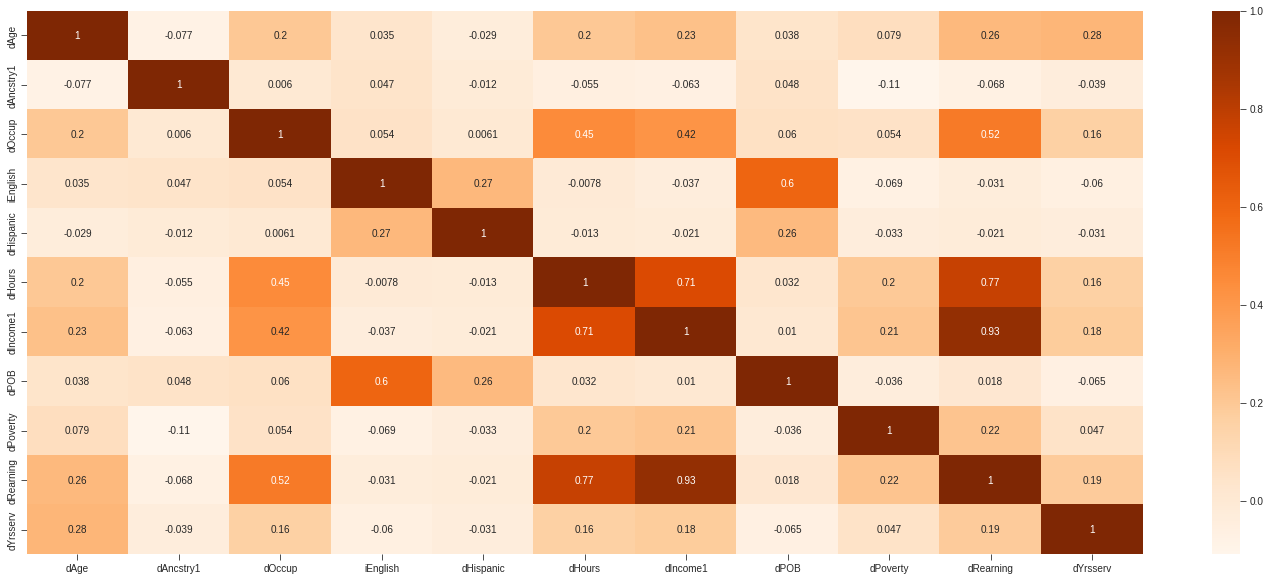

In [ ]:
#Using Pearson Correlation Training Data Heatmap between variables 
plt.figure(figsize=(25,10))
Names=['dAge','dAncstry1','dOccup', 'iEnglish','dHispanic','dHours','dIncome1','dPOB','dPoverty','dRearning','dYrsserv']
cor = USCensusDF[Names].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Oranges)
plt.show()

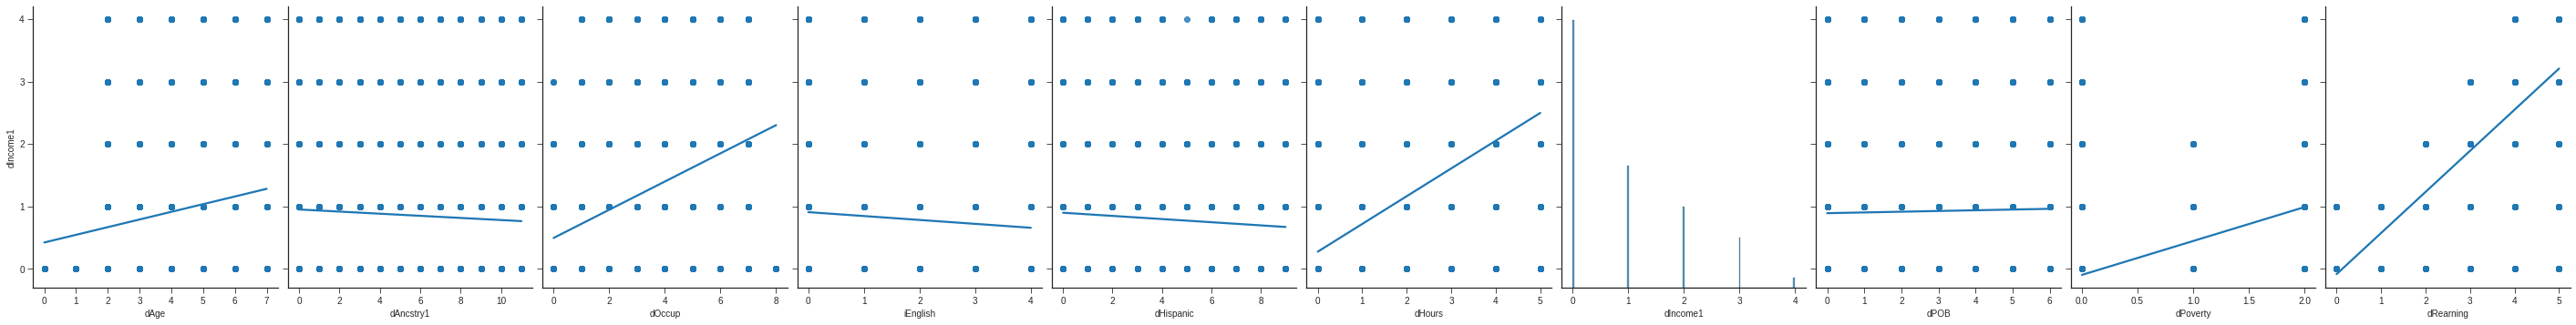

In [ ]:
sns.pairplot(x_vars=USCensusDF[Names][USCensusDF[Names].columns[:-1]], y_vars=USCensusDF[["dIncome1"]], data=USCensusDF[Names],kind="reg",height=5, aspect=.8)

In [ ]:
USCensusDF[Names].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2458284 entries, 1 to 2458284
Data columns (total 11 columns):
 #   Column     Dtype
---  ------     -----
 0   dAge       int64
 1   dAncstry1  int64
 2   dOccup     int64
 3   iEnglish   int64
 4   dHispanic  int64
 5   dHours     int64
 6   dIncome1   int64
 7   dPOB       int64
 8   dPoverty   int64
 9   dRearning  int64
 10  dYrsserv   int64
dtypes: int64(11)
memory usage: 225.1 MB


#### Visualize the data to check how they spread in each data column and also verified any imbalance data.

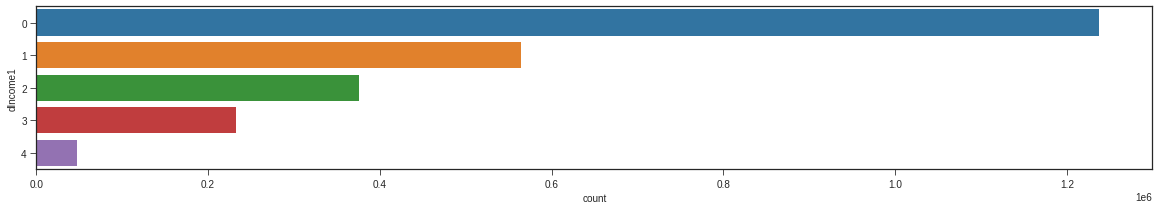

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="dIncome1", data=USCensusDF)

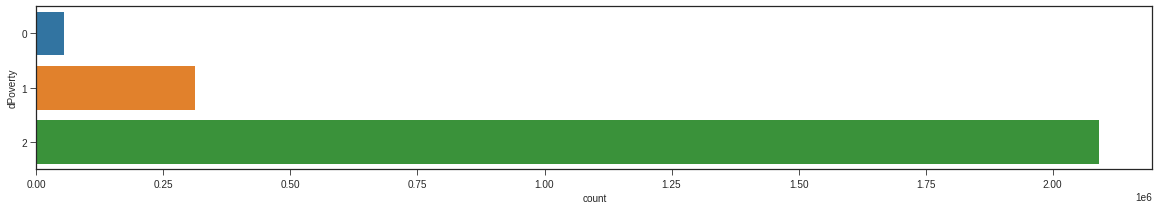

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="dPoverty", data=USCensusDF)

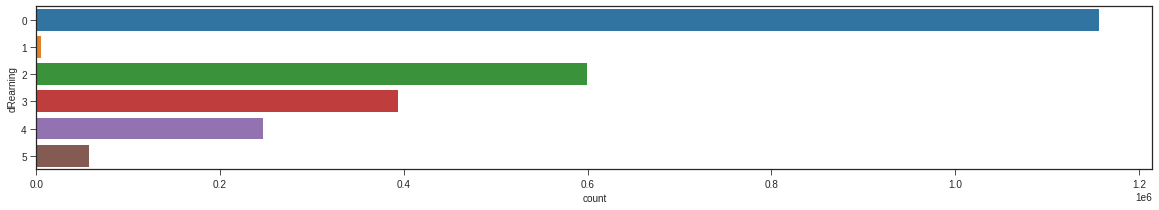

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="dRearning", data=USCensusDF)

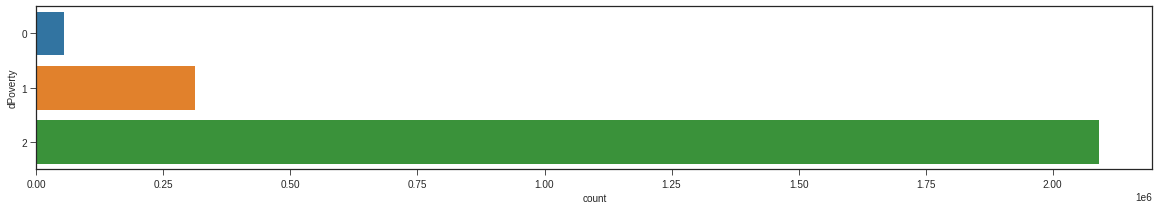

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="dPoverty", data=USCensusDF)

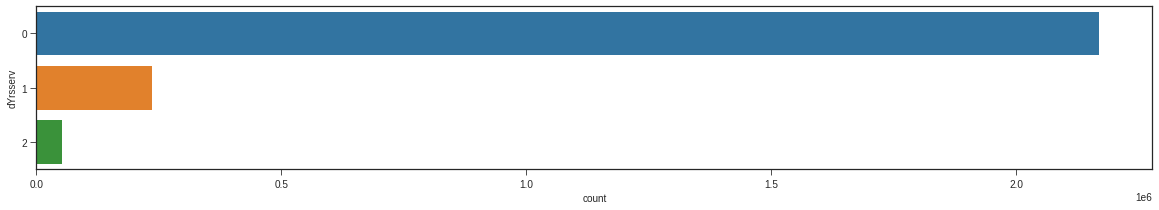

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="dYrsserv", data=USCensusDF)

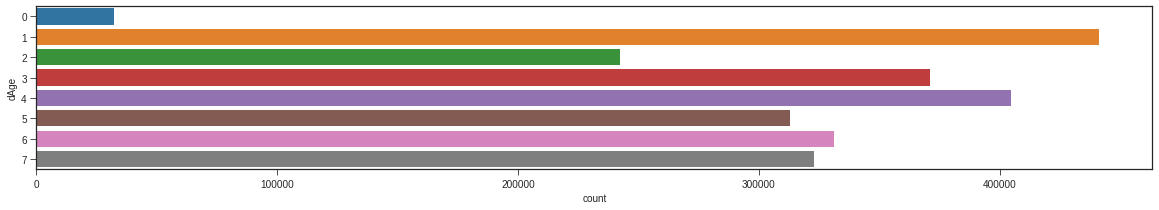

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="dAge", data=USCensusDF)

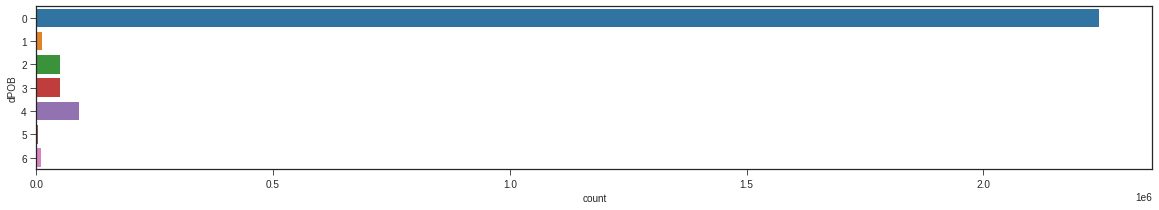

In [ ]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="dPOB", data=USCensusDF)

In [ ]:
USCensusDF[(USCensusDF['dIncome1'] > 0) & (USCensusDF['dIncome1'] <15000)].head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,iFertil,dHispanic,dHour89,dHours,iImmigr,dIncome1,dIncome2,dIncome3,dIncome4,dIncome5,dIncome6,dIncome7,dIncome8,dIndustry,iKorean,iLang1,iLooking,iMarital,iMay75880,iMeans,iMilitary,iMobility,iMobillim,dOccup,iOthrserv,iPerscare,dPOB,dPoverty,dPwgt1,iRagechld,dRearning,iRelat1,iRelat2,iRemplpar,iRiders,iRlabor,iRownchld,dRpincome,iRPOB,iRrelchld,iRspouse,iRvetserv,iSchool,iSept80,iSex,iSubfam1,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
1,10001,6,1,1,0,0,7,5,2,2,0,0,3,0,1,1,0,1,0,0,0,0,1,0,0,4,0,2,0,0,0,1,4,1,2,2,0,2,0,2,2,4,2,1,0,0,1,1,0,2,10,0,1,0,1,0,1,0,0,0,1,0,2,1,1,0,5,1,0
2,10002,3,1,2,0,0,7,4,2,2,0,0,1,0,4,4,0,1,0,1,0,0,0,0,0,1,0,2,0,4,0,10,4,1,2,4,0,2,0,2,1,4,2,2,0,0,0,1,0,2,10,0,6,0,1,0,1,0,0,0,2,0,2,1,1,0,10,1,0
3,10003,4,1,2,0,0,1,3,2,2,0,0,3,0,3,3,0,1,0,0,0,0,0,0,1,4,0,2,0,2,0,1,4,1,2,2,0,2,0,2,1,2,2,0,0,0,1,1,0,2,10,0,4,0,1,0,1,0,0,0,1,0,1,1,1,0,10,1,0
7,10007,4,1,2,0,0,6,0,2,2,0,0,4,0,5,5,0,2,1,0,0,0,0,0,0,9,0,2,0,0,0,11,4,1,2,3,0,2,0,2,1,2,3,1,0,0,0,1,0,3,10,0,1,0,1,0,1,0,0,0,0,0,2,1,1,0,11,1,0
8,10008,6,1,1,0,0,1,0,2,2,0,0,7,0,1,0,0,1,0,0,0,0,0,0,0,7,0,2,2,0,0,0,4,1,2,6,0,2,0,2,1,2,2,1,0,0,0,6,0,2,10,0,1,0,1,0,1,0,0,3,0,0,1,1,2,0,10,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

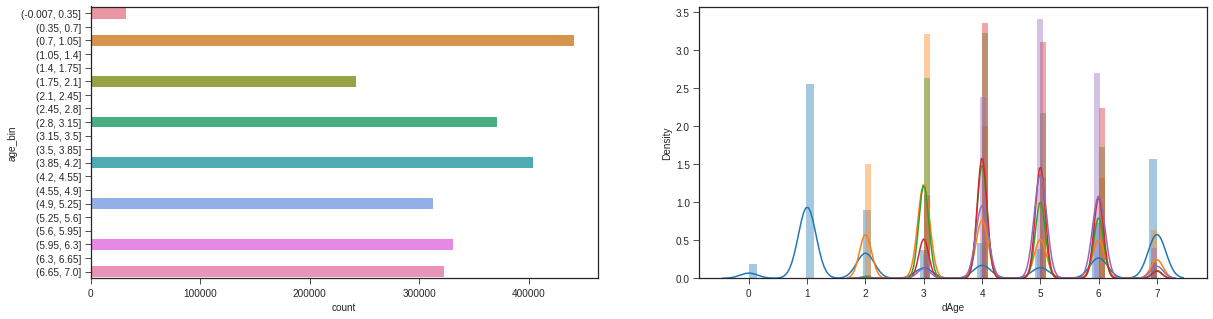

In [ ]:
USCensusDF['age_bin'] = pd.cut(USCensusDF['dAge'], 20)
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=USCensusDF)
plt.subplot(1, 2, 2)
sns.distplot(USCensusDF[USCensusDF['dIncome1'] == 0]['dAge'], kde_kws={"label": "0"})
sns.distplot(USCensusDF[(USCensusDF['dIncome1'] == 1)]['dAge'], kde_kws={"label": "<15000"})
sns.distplot(USCensusDF[(USCensusDF['dIncome1'] == 2) ] ['dAge'], kde_kws={"label": "<30000"})
sns.distplot(USCensusDF[(USCensusDF['dIncome1'] == 3) ]['dAge'], kde_kws={"label": "<60000"})
sns.distplot(USCensusDF[(USCensusDF['dIncome1'] == 4) ] ['dAge'], kde_kws={"label": ">=60000"})

In [ ]:
USCensusDF[['dIncome1', 'dAge']].groupby(['dIncome1'], as_index=False).mean().sort_values(by='dAge', ascending=False)

,dIncome1,dAge
4,4,5.047888
3,3,4.706805
2,2,4.353312
1,1,3.966338
0,0,3.440131


<Figure size 7200x14400 with 0 Axes>

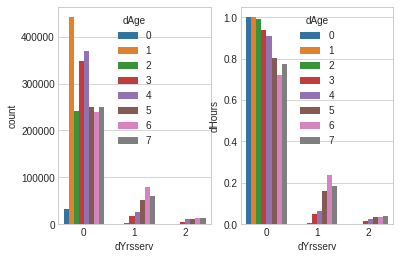

In [ ]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "dYrsserv", "dHours", "dAge"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(100,200)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=USCensusDF, ax=axes[0])

propDf = (USCensusDF[x]
           .groupby(USCensusDF[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=propDf, ax=axes[1])

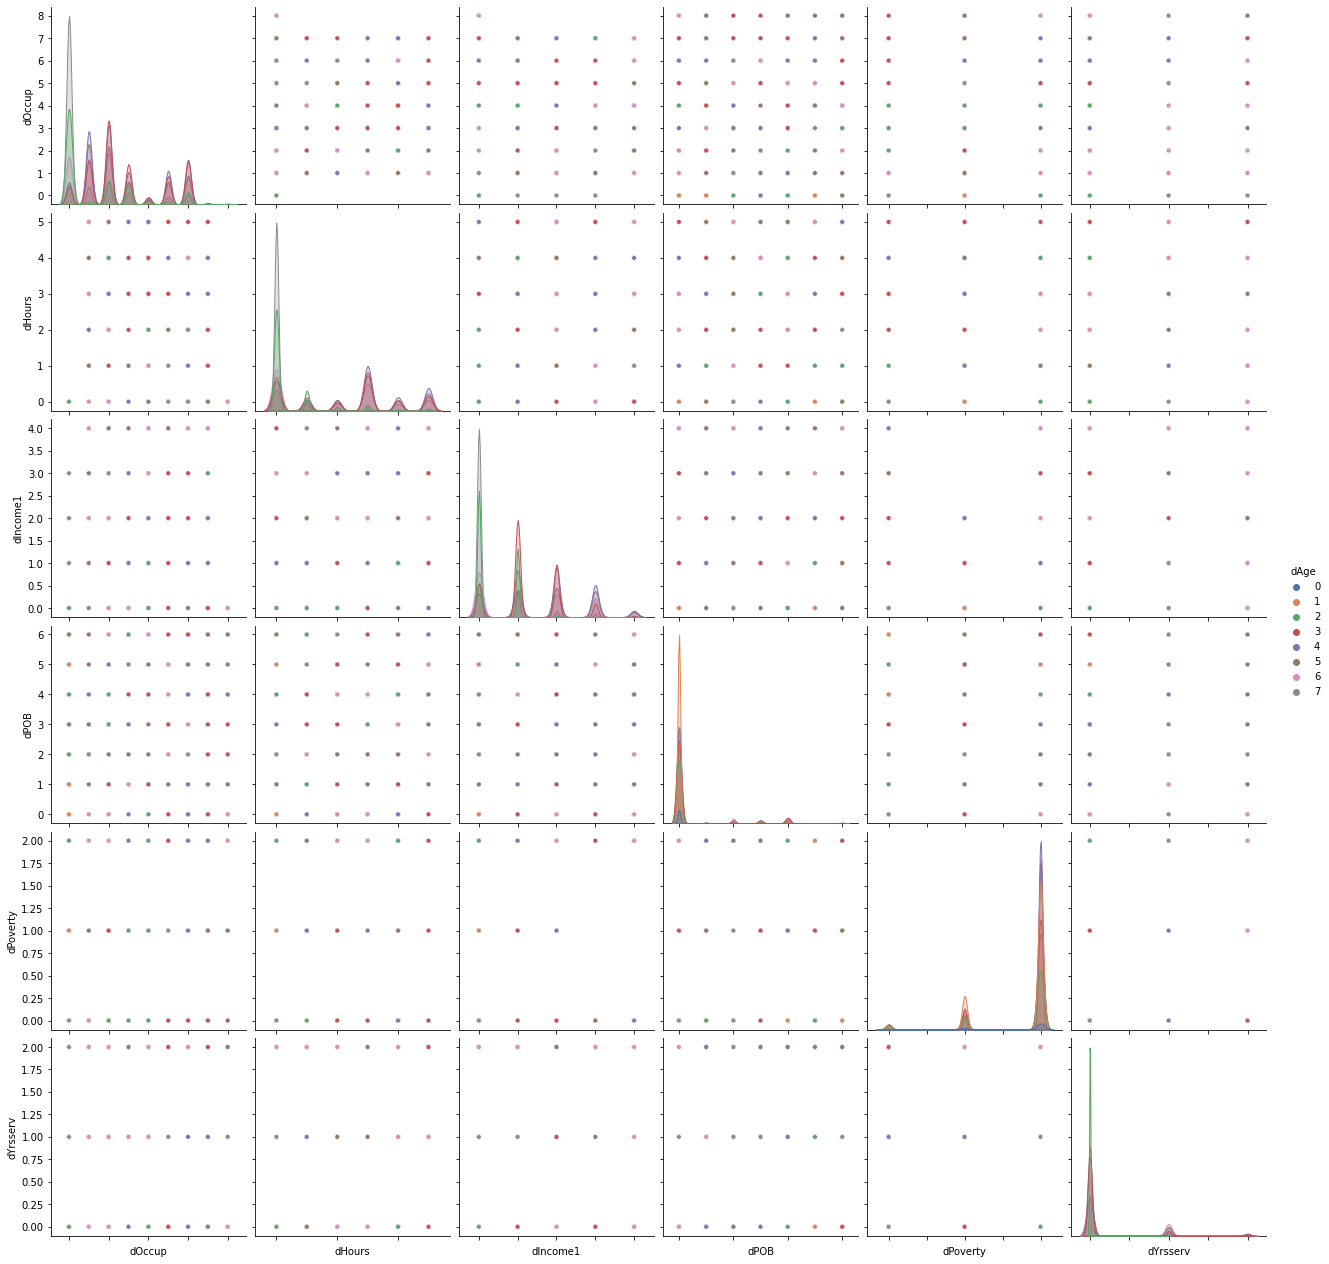

In [ ]:
#pair plots of entire dataset
Names=['dAge','dOccup', 'dHours','dIncome1','dPOB','dPoverty','dYrsserv']
pp = sns.pairplot(USCensusDF[Names], hue = 'dAge', palette = 'deep', 
                  height=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

In [ ]:
USCensusDF['dHours_bin'] = pd.cut(USCensusDF['dHours'], 10)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="dHours", data=adultDf);
plt.subplot(1, 2, 2)
sns.distplot(USCensusDF['dHours']);
sns.distplot(USCensusDF[USCensusDF['dIncome1'] == '>50K']['hours_per_week'], kde_kws={"label": ">$50K"})
sns.distplot(USCensusDF[USCensusDF['dIncome1'] == '<=50K']['hours_per_week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

In [ ]:
# Crossing Numerical Features
adultDf['age_hours'] = adultDf['age']*adultDf['hours_per_week']
adultDf['age_hours_bin'] = pd.cut(adultDf['age_hours'], 10)
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_hours_bin", data=adultDf);
plt.subplot(1, 2, 2)
sns.distplot(adultDf[adultDf['predclass'] == '>50K']['age_hours'], kde_kws={"label": ">$50K"})
sns.distplot(adultDf[adultDf['predclass'] == '<=50K']['age_hours'], kde_kws={"label": "<$50K"})

In [ ]:
#pair plots of entire dataset
pp = sns.pairplot(USCensusDF, hue = 'dIncome1', palette = 'deep', 
                  size=6, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=30) )
pp.set(xticklabels=[])

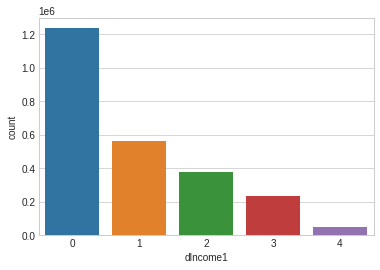

In [ ]:
sns.countplot(x='dIncome1',data = USCensusDF)


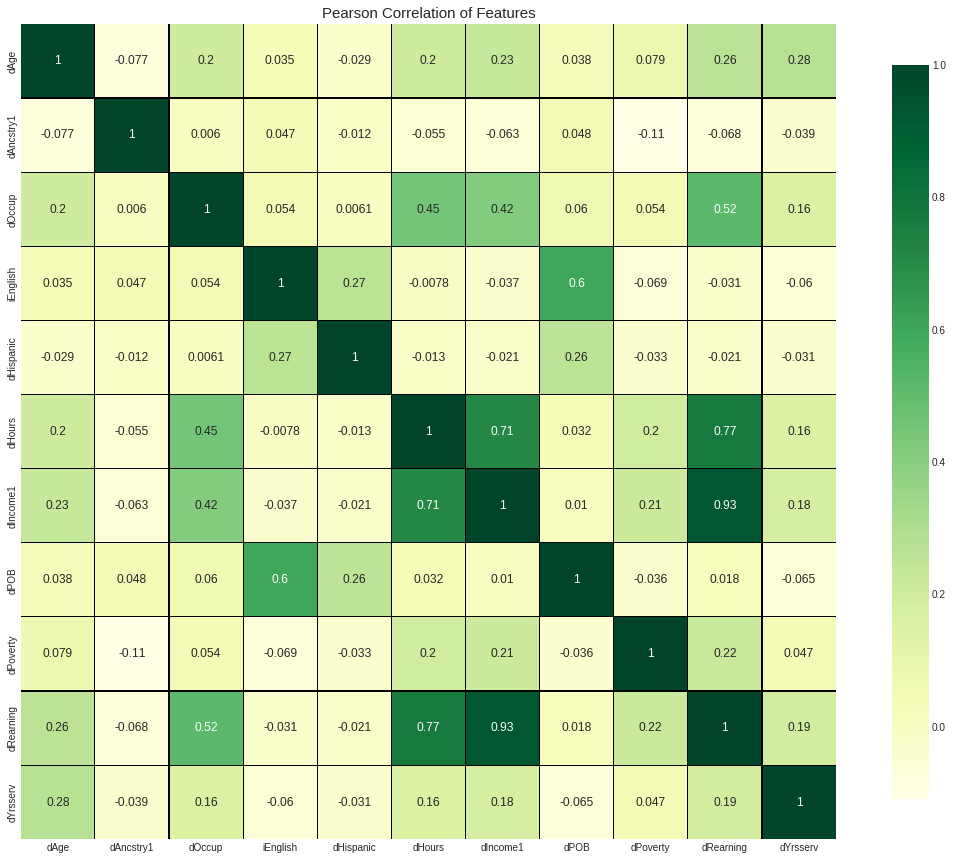

In [ ]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='black',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

Names=['dAge','dAncstry1','dOccup', 'iEnglish','dHispanic','dHours','dIncome1','dPOB','dPoverty','dRearning','dYrsserv']
correlation_heatmap(USCensusDF[Names])

In [ ]:
USCensusDF.tail()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,iFertil,dHispanic,dHour89,dHours,iImmigr,dIncome1,dIncome2,dIncome3,dIncome4,dIncome5,dIncome6,dIncome7,dIncome8,dIndustry,iKorean,iLang1,iLooking,iMarital,iMay75880,iMeans,iMilitary,iMobility,iMobillim,dOccup,iOthrserv,iPerscare,dPOB,dPoverty,dPwgt1,iRagechld,dRearning,iRelat1,iRelat2,iRemplpar,iRiders,iRlabor,iRownchld,dRpincome,iRPOB,iRrelchld,iRspouse,iRvetserv,iSchool,iSept80,iSex,iSubfam1,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv,age_bin
2458280,2468280,7,1,2,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,2,0,0,0,2,1,2,0,0,2,0,2,0,0,0,0,0,0,0,6,0,2,22,0,1,10,1,0,0,0,0,3,0,0,0,2,2,1,7,5,1,"(6.65, 7.0]"
2458281,2468281,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,4,0,0,0,2,0,0,0,0,0,2,2,4,0,2,0,121,0,0,1,0,10,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,4,0,0,"(0.7, 1.05]"
2458282,2468282,3,3,1,0,0,1,2,2,2,1,0,0,0,3,5,0,3,0,0,0,0,0,0,0,6,0,1,0,0,0,1,4,2,2,5,0,2,0,2,2,0,4,0,0,0,1,1,0,4,10,0,1,0,1,0,0,0,0,0,5,0,2,1,1,0,11,1,0,"(2.8, 3.15]"
2458283,2468283,6,0,1,0,0,1,3,2,2,0,0,1,7,2,2,0,2,0,0,0,0,0,0,0,5,0,2,0,4,0,10,4,1,2,2,0,2,0,2,2,4,3,0,0,0,0,1,0,3,10,0,6,0,1,0,1,0,0,0,1,0,2,1,1,0,10,1,0,"(5.95, 6.3]"
2458284,2468284,2,3,1,0,4,0,0,0,0,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,2,0,0,0,0,4,2,2,0,0,2,0,111,0,0,1,0,52,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,5,0,0,"(1.75, 2.1]"


In [ ]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = USCensusDF.loc[:, ['dAge','dAncstry1','dOccup', 'iEnglish','dHispanic','dHours','dPOB','dPoverty','dRearning','dYrsserv']]  

plot_bivariate_bar(bivariate_df, hue='dIncome1', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

<Figure size 1440x1080 with 0 Axes>

In [ ]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="dOccup", y="dAge", hue="dIncome1",
                    data=USCensusDF, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [ ]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="dYrsserv", y="dAge", hue="dIncome1",
                    data=USCensusDF, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

### **2 Step.Encode, Feature Selection, Balance Data, Scaling, Transformation**

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

In [ ]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [ ]:
USCensusDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458285 entries, 0 to 2458284
Data columns (total 69 columns):
 #   Column     Dtype
---  ------     -----
 0   caseid     int64
 1   dAge       int64
 2   dAncstry1  int64
 3   dAncstry2  int64
 4   iAvail     int64
 5   iCitizen   int64
 6   iClass     int64
 7   dDepart    int64
 8   iDisabl1   int64
 9   iDisabl2   int64
 10  iEnglish   int64
 11  iFeb55     int64
 12  iFertil    int64
 13  dHispanic  int64
 14  dHour89    int64
 15  dHours     int64
 16  iImmigr    int64
 17  dIncome1   int64
 18  dIncome2   int64
 19  dIncome3   int64
 20  dIncome4   int64
 21  dIncome5   int64
 22  dIncome6   int64
 23  dIncome7   int64
 24  dIncome8   int64
 25  dIndustry  int64
 26  iKorean    int64
 27  iLang1     int64
 28  iLooking   int64
 29  iMarital   int64
 30  iMay75880  int64
 31  iMeans     int64
 32  iMilitary  int64
 33  iMobility  int64
 34  iMobillim  int64
 35  dOccup     int64
 36  iOthrserv  int64
 37  iPerscare  int64
 38  dP

In [ ]:
USCensusDFEncode = USCensusDF.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)), axis=0, result_type='expand')
USCensusDFEncode.head()

,caseid,dAge,dAncstry1,dAncstry2,iAvail,iCitizen,iClass,dDepart,iDisabl1,iDisabl2,iEnglish,iFeb55,iFertil,dHispanic,dHour89,dHours,iImmigr,dIncome1,dIncome2,dIncome3,dIncome4,dIncome5,dIncome6,dIncome7,dIncome8,dIndustry,iKorean,iLang1,iLooking,iMarital,iMay75880,iMeans,iMilitary,iMobility,iMobillim,dOccup,iOthrserv,iPerscare,dPOB,dPoverty,dPwgt1,iRagechld,dRearning,iRelat1,iRelat2,iRemplpar,iRiders,iRlabor,iRownchld,dRpincome,iRPOB,iRrelchld,iRspouse,iRvetserv,iSchool,iSept80,iSex,iSubfam1,iSubfam2,iTmpabsnt,dTravtime,iVietnam,dWeek89,iWork89,iWorklwk,iWWII,iYearsch,iYearwrk,dYrsserv
0,0,5,0,0,0,0,5,3,2,2,1,0,1,0,4,3,0,2,0,0,1,0,0,0,0,2,0,1,0,1,0,1,4,2,2,3,0,2,0,2,1,4,3,0,0,0,3,1,0,3,2,0,3,0,1,0,1,0,0,0,5,0,2,1,1,0,3,1,0
1,111,6,1,0,0,0,7,5,2,2,0,0,7,0,1,1,0,1,0,0,0,0,1,0,0,7,0,2,0,0,0,1,4,1,2,2,0,2,0,2,2,4,2,1,0,0,1,1,0,2,0,0,1,0,1,0,1,0,0,0,1,0,2,1,1,0,13,1,0
2,222,3,1,4,0,0,7,4,2,2,0,0,1,0,4,4,0,1,0,1,0,0,0,0,0,1,0,2,0,4,0,2,4,1,2,4,0,2,0,2,1,4,2,6,0,0,0,1,0,2,0,0,6,0,1,0,1,0,0,0,2,0,2,1,1,0,2,1,0
3,333,4,1,4,0,0,1,3,2,2,0,0,7,0,3,3,0,1,0,0,0,0,0,0,1,7,0,2,0,2,0,1,4,1,2,2,0,2,0,2,1,2,2,0,0,0,1,1,0,2,0,0,4,0,1,0,1,0,0,0,1,0,1,1,1,0,2,1,0
4,444,7,1,0,0,0,0,0,2,2,0,0,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,2,0,0,0,4,1,2,0,0,2,0,2,1,4,0,1,0,0,0,6,0,2,2,0,1,0,1,0,1,0,0,3,0,0,0,2,2,0,13,6,0


### Feature Selection using Forward Selection, BackWard Selection

In [ ]:
drop_elements = ['dAge','dAncstry1','dOccup', 'iEnglish','dHispanic','dHours', 'dPOB','dPoverty','dRearning','dYrsserv'] 
y_train = USCensusDFEncode['dIncome1']
X_train = USCensusDFEncode.drop(drop_elements, axis=1)
y_test = USCensusDFEncode["dIncome1"]
X_test = USCensusDFEncode.drop(['dIncome1'], axis=1)
print("Train Columns",X_train.columns)
print("Size Train", X_train.shape, y_train.shape)
print("Size Test", X_test.shape, y_test.shape)

Train Columns Index(['caseid', 'dAncstry2', 'iAvail', 'iCitizen', 'iClass', 'dDepart',
       'iDisabl1', 'iDisabl2', 'iFeb55', 'iFertil', 'dHour89', 'iImmigr',
       'dIncome1', 'dIncome2', 'dIncome3', 'dIncome4', 'dIncome5', 'dIncome6',
       'dIncome7', 'dIncome8', 'dIndustry', 'iKorean', 'iLang1', 'iLooking',
       'iMarital', 'iMay75880', 'iMeans', 'iMilitary', 'iMobility',
       'iMobillim', 'iOthrserv', 'iPerscare', 'dPwgt1', 'iRagechld', 'iRelat1',
       'iRelat2', 'iRemplpar', 'iRiders', 'iRlabor', 'iRownchld', 'dRpincome',
       'iRPOB', 'iRrelchld', 'iRspouse', 'iRvetserv', 'iSchool', 'iSept80',
       'iSex', 'iSubfam1', 'iSubfam2', 'iTmpabsnt', 'dTravtime', 'iVietnam',
       'dWeek89', 'iWork89', 'iWorklwk', 'iWWII', 'iYearsch', 'iYearwrk'],
      dtype='object')
Size Train (2458285, 59) (2458285,)
Size Test (2458285, 68) (2458285,)


##### Feature Selection using Forward Selection, BackWard Selection

In [ ]:
target= USCensusDFEncode['dIncome1']

def forward_selection(USCensusDFEncode, target, significance_level=0.05):
    initial_features = USCensusDFEncode.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(USCensusDFEncode[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

forward_selection(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
def backward_elimination(USCensusDFEncode, target,significance_level = 0.05):
    features = USCensusDFEncode.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(USCensusDFEncode[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

backward_elimination(X_train,y_train)

['iAvail',
 'iCitizen',
 'iClass',
 'dDepart',
 'iDisabl2',
 'iFertil',
 'dHour89',
 'dIncome1',
 'dIncome3',
 'dIncome4',
 'dIncome7',
 'dIndustry',
 'iLang1',
 'iLooking',
 'iMeans',
 'iMobility',
 'iRagechld',
 'iRelat1',
 'iRemplpar',
 'iRPOB',
 'iRspouse',
 'iSubfam1',
 'dTravtime',
 'iYearsch',
 'iYearwrk']

### 3&4 Steps:Check Imbalance data based on Income Spread. Observed that 50% data shows income=0 and 23% its <15000 and 16% <30000, 10% <60000, 2% >=60000. Which is imbalanced data

In [ ]:
#Checking If data is Imbalance
USCensusDFEncode.dIncome1.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    50.34%
1    22.97%
2     15.3%
3     9.45%
4     1.94%
Name: dIncome1, dtype: object

In [ ]:
SelectedNames=[
 'iAvail',
 'iDisabl1',
 'iFeb55',
 'iFertil',
 'dHour89',
 'iImmigr',
 'dIncome1',
 'dIncome4',
 'dIncome5',
 'iKorean',
 'iMarital',
 'iMay75880',
 'iMeans',
 'iMilitary',
 'iMobility',
 'iMobillim',
 'iPerscare',
 'dPwgt1',
 'iRagechld',
 'iRelat1',
 'iRelat2',
 'iRemplpar',
 'iRlabor',
 'iRPOB',
 'iRspouse',
 'iRvetserv',
 'iSept80',
 'iSex',
 'iTmpabsnt',
 'iVietnam',
 'dWeek89',
 'iWork89',
 'iWorklwk',
 'iWWII',
 'iYearsch',
 'iYearwrk']

SelectedNames =['iSchool',
 'dIncome6',
 'iRagechld',
 'iMay75880',
 'dHour89',
 'iClass',
 'dRpincome',
 'iRspouse',
 'iWork89',
 'iWWII',
 'dIncome7',
 'dDepart',
 'dIncome1',
 'dTravtime',
 'iYearsch',
 'iFertil',
 'caseid']
USCensusDFEncode = USCensusDF[SelectedNames].apply(lambda col: LabelEncoder().fit_transform(col.astype(str)), axis=0, result_type='expand')
USCensusDFEncode.head()

,iSchool,dIncome6,iRagechld,iMay75880,dHour89,iClass,dRpincome,iRspouse,iWork89,iWWII,dIncome7,dDepart,dIncome1,dTravtime,iYearsch,iFertil,caseid
0,1,0,4,0,4,5,3,3,1,0,0,3,2,5,3,1,0
1,1,1,4,0,1,7,2,1,1,0,0,5,1,1,13,7,111
2,1,0,4,0,4,7,2,6,1,0,0,4,1,2,2,1,222
3,1,0,2,0,3,1,2,4,1,0,0,3,1,1,2,7,333
4,1,0,4,0,0,0,2,1,2,0,0,0,0,0,13,7,444


In [ ]:
drop_elements =['iSchool',
 'dIncome6',
 'iRagechld',
 'iMay75880',
 'dHour89',
 'iClass',
 'dRpincome',
 'iRspouse',
 'iWork89',
 'iWWII',
 'dIncome7',
 'dDepart',
 'dIncome1',
 'dTravtime',
 'iYearsch',
 'iFertil']
y_train = USCensusDFEncode['dIncome1']
X_train = USCensusDFEncode.drop('dIncome1', axis=1)
y_test = USCensusDFEncode["dIncome1"]
X_test = USCensusDFEncode.drop(['dIncome1'], axis=1)
print("Train Columns",X_train.columns)
print("Size Train", X_train.shape, y_train.shape)
print("Size Test", X_test.shape, y_test.shape)

Train Columns Index(['iSchool', 'dIncome6', 'iRagechld', 'iMay75880', 'dHour89', 'iClass',
       'dRpincome', 'iRspouse', 'iWork89', 'iWWII', 'dIncome7', 'dDepart',
       'dTravtime', 'iYearsch', 'iFertil', 'caseid'],
      dtype='object')
Size Train (2458285, 16) (2458285,)
Size Test (2458285, 16) (2458285,)


##### Using Minmax Scaler Train and Test data transformed

In [ ]:
#Data normalization - Feature Scaling
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_scaled = scaler.transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#sc = StandardScaler()
#X_train_std = sc.fit_transform(X_train)
#pca = PCA(n_components=None)
#x_train_pca = pca.fit_transform(X_train_std)
#a = pca.explained_variance_ratio_
#a_running = a.cumsum()
#a_running

from sklearn.preprocessing import MinMaxScaler

def feature_scaling(X_train, X_test):
    scaler = MinMaxScaler()

    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.astype(np.float)), 
                                  index=X_train.index, columns=X_train.columns)

    X_test_scaled = pd.DataFrame(scaler.transform(X_test.astype(np.float)),
                                 index=X_test.index, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = feature_scaling(X_train, X_test)

In [ ]:
#Handle Imbalance data by Oversampling/Undersampling
from imblearn.over_sampling import SMOTE

def handle_imbalance_data(X_train, y_train):
    unique, counts = np.unique(y_train, return_counts=True)  
    print(f'Before Resampling Values count of Target Class(0/1) in Training dataset\n{dict(zip(unique, counts))}\n')
    sm = SMOTE(random_state=20)
    X_train_rs, y_train_rs = sm.fit_resample(X_train, y_train)
    unique, counts = np.unique(y_train_rs, return_counts=True)    
    print(f'After Resampling Values count of Target Class(0/1) in Training dataset\n{dict(zip(unique, counts))}')
    return X_train_rs, y_train_rs 

X_train, y_train = handle_imbalance_data(X_train_scaled, y_train)

Before Resampling Values count of Target Class(0/1) in Training dataset
{0: 1237403, 1: 564755, 2: 376031, 3: 232422, 4: 47674}

After Resampling Values count of Target Class(0/1) in Training dataset
{0: 1237403, 1: 1237403, 2: 1237403, 3: 1237403, 4: 1237403}


##### Principal Component Analysis(PCA)

In [ ]:
#Principal Component Analysis (PCA)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

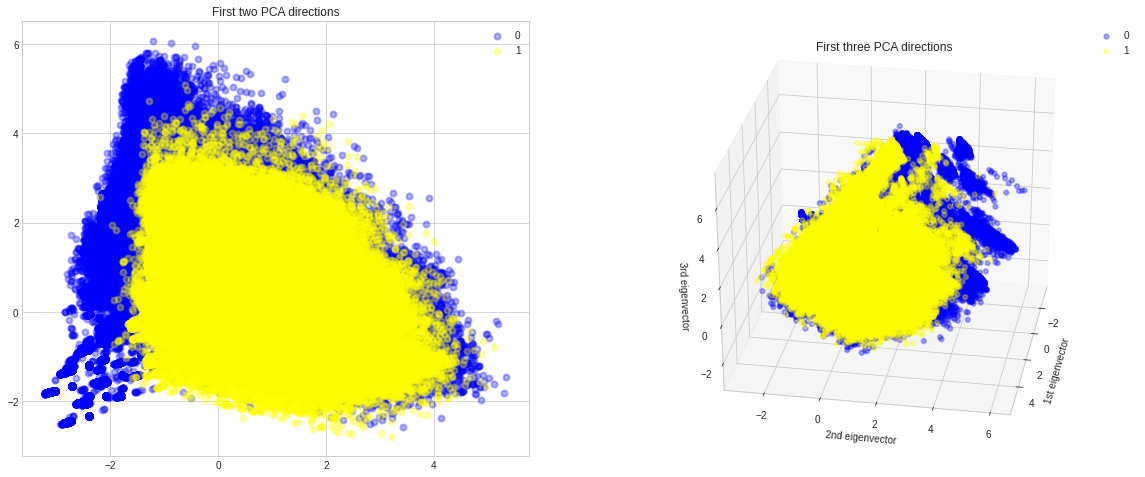

In [ ]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(USCensusDFEncode.drop('dIncome1', axis=1))
X = std_scale.transform(USCensusDFEncode.drop('dIncome1', axis=1))
y = USCensusDFEncode['dIncome1']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

### **5 Step.Building Machine Learning Model(RandomForest) and compared other models**

#### Perception Method

In [ ]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

In [ ]:
y_pred = ppn.predict(X_test_scaled)
acc_perception = round(ppn.score(X_train, y_train) * 100, 2)
accuracy_score(y_pred,y_test)

0.7360692515310471

#### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test_scaled,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.999980131266102


#### Gaussian Naive Bayes Model

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test_scaled,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.9272671881105496


#### SVM Model 

In [ ]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test_scaled,y_test)
print('The accuracy of SVC is', score_svc)

#### Logistic Regression Model

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test_scaled,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


The accuracy of the Logistic Regression is 0.7375043100152008


#### KNN Model 

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test_scaled,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.9649515534038453


#### Decision Tree Model

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test_scaled)
score_decisionTree = decision_tree.score(X_test_scaled,y_test)
print('The accuracy of the Decision Tree Model is',score_decisionTree)

The accuracy of the Decision Tree Model is 1.0


### **6 Step.Domain Expert to choose best model. It shows that Random forest with high accuracy**

In [ ]:
#Plotting the accuracy of the used algorithms to find the best fit
score_svc=0.76788246238
score_knn=0.9649515534038453
score_logreg=0.7375043100152008
score_randomforest=0.999980131266102
score_gaussian=0.9272671881105496
score_decisionTree=1.0
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [score_svc, score_knn, score_logreg, score_randomforest, score_gaussian,score_decisionTree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(8)

,Model
Score,
1.000000,Decision Tree
0.999980,Random Forest
0.964952,KNN
0.927267,Naive Bayes
0.767882,Support Vector Machines
0.737504,Logistic Regression


### **7 Step.Dimensionality Reduction using Randomforest Classifier

####Random Forest Built-in Feature Importance
The Random Forest algorithm has built-in feature importance which can be computed in two ways:

**Gini importance (or mean decrease impurity)**, which is computed from the Random Forest structure. Let’s look how the Random Forest is constructed. It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction. We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. This method is available in scikit-learn implementation of the Random Forest (for both classifier and regressor). It is worth to mention, that in this method we should look at relative values of the computed importances. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality. What is more, in the case of correlated features it can select one of the feature and neglect the importance of the second one (which can lead to wrong conclusions).

**Mean Decrease Accuracy** - is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package. The very similar to this method is permutation based importance described below in this post.

#### Importance of variables to classify Income accuratly

In [ ]:
#Finding significance of each feature in the best fit model
importances = pd.DataFrame({'feature':X_train_scaled.columns,'importance':np.round(randomforest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
dRpincome,0.585
dHour89,0.132
iClass,0.071
dDepart,0.041
dTravtime,0.034
iWork89,0.031
iYearsch,0.029
iRspouse,0.019
caseid,0.019


Text(0.5, 0, 'Random Forest Feature Importance')

<Figure size 1440x720 with 0 Axes>

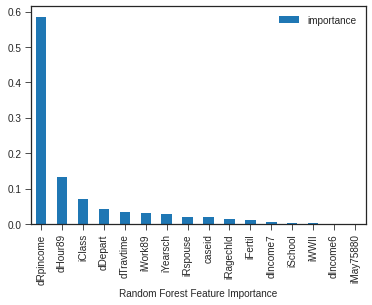

In [ ]:
fig = plt.figure(figsize=(20,10))
plt.style.use('seaborn-ticks')
importances.plot.bar()
plt.xlabel("Random Forest Feature Importance")

#### Based on Backward Elimination, Forward Selection and Random Forest Feature Selection, rebuild Random Forest Model

In [ ]:
# Based on Gini importance (or mean decrease impurity) and Mean Decrease Accuracy 

X_train1 = USCensusDFEncode[['dRpincome', 'dHour89', 'iClass', 'dDepart', 'dTravtime', 'iWork89', 'iYearsch', 'iRspouse', 'iRagechld',  'iFertil','dIncome7','iSchool','iWWII','dIncome6']]
X_test1 = USCensusDFEncode[['dRpincome', 'dHour89', 'iClass', 'dDepart', 'dTravtime', 'iWork89', 'iYearsch', 'iRspouse', 'iRagechld',  'iFertil','dIncome7','iSchool','iWWII','dIncome6']]
y_train =  USCensusDFEncode['dIncome1']

X_train1_scaled, X_test1_scaled = feature_scaling(X_train1, X_test1)
X_train1, y_train1 = handle_imbalance_data(X_train1_scaled, y_train)

# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train1, y_train1)

#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test1_scaled,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

Before Resampling Values count of Target Class(0/1) in Training dataset
{0: 76349, 1: 34493, 2: 23114, 3: 14159, 4: 2876}

After Resampling Values count of Target Class(0/1) in Training dataset
{0: 76349, 1: 76349, 2: 76349, 3: 76349, 4: 76349}
The accuracy of the Random Forest Model is 0.9891980316707618


###9.Correcting Selection Bias using Cross Validation on Random Forest

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
randomforest=RandomForestClassifier(n_estimators=200)
cv_res=cross_val_score(randomforest,X_train1,y_train1,cv=10)
print(cv_res.mean()*100)

98.07726123195108


In [ ]:
#Grid Search for Hyperparameter Tuning
randomforest=RandomForestClassifier()
kf=KFold(n_splits=3)
max_features=np.array([1,2,3])
n_estimators=np.array([25,50,100])
min_samples_leaf=np.array([25,50])
param_grid=dict(n_estimators=n_estimators,max_features=max_features,min_samples_leaf=min_samples_leaf)
grid=GridSearchCV(estimator=randomforest,param_grid=param_grid,cv=kf)
gres=grid.fit(X_train1,y_train1)
print("Best",gres.best_score_)
print("params",gres.best_params_)

Best 0.9290363809380809
params {'max_features': 3, 'min_samples_leaf': 25, 'n_estimators': 25}


In [ ]:
# Random Forest Classifier
#randomforest = RandomForestClassifier(n_estimators=25,max_features=5,min_samples_leaf=25)
randomforest = RandomForestClassifier(n_estimators=50,max_features=3,min_samples_leaf=25)
randomforest.fit(X_train1, y_train1)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test1_scaled,y_test)
print('The accuracy of the Final Random Forest Model is', score_randomforest)

The accuracy of the Final Random Forest Model is 0.963143498619123


### 10. Over Categorizing Check: If we take Train & Test dat from same dataset USCensus1990.data.txt, it shows that its overfitting

In [ ]:
#Splitting the data into test data and training data
from sklearn.model_selection import train_test_split
USCensusDFEncodeSelect = USCensusDFEncode[['dRpincome', 'dHour89', 'iClass', 'dDepart', 'dTravtime', 'iWork89', 'iYearsch', 'iRspouse', 'iRagechld',  'iFertil','dIncome7','iSchool','iWWII','dIncome6','dIncome1']]
X = USCensusDFEncodeSelect.drop(['dIncome1'], axis=1)
Y = USCensusDFEncodeSelect['dIncome1']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
#Using StandardScalar to normalise the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [ ]:
#Applying the random forest algorithm
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X_train, Y_train)
Y_prediction = randomforest.predict(X_test)
randomforest.score(X_train, Y_train)
score_randomforest = randomforest.score(X_train, Y_train)
print('The accuracy of randomforest is', score_randomforest)

The accuracy of randomforest is 0.9904913286594192


### Describe your HDFS setup and how you implemented a machine learning algorithm on the data in the system

In [ ]:
# Install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#create java home variable 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

#### Step 1: Install Hadoop

In [ ]:
#download hadoop
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz

--2021-12-06 20:11:29--  https://downloads.apache.org/hadoop/common/hadoop-3.3.0/hadoop-3.3.0.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 500749234 (478M) [application/x-gzip]
Saving to: ‘hadoop-3.3.0.tar.gz’

hadoop-3.3.0.tar.gz 100%[===================>] 477.55M  27.2MB/s    in 18s     

2021-12-06 20:11:48 (26.5 MB/s) - ‘hadoop-3.3.0.tar.gz’ saved [500749234/500749234]



In [ ]:
#we’ll use the tar command with the -x flag to extract, -z to uncompress, 
#-v for verbose output, and -f to specify that we’re extracting from a file
!tar -xzvf hadoop-3.3.0.tar.gz

In [ ]:
#copying the hadoop file to user/local
!cp -r hadoop-3.3.0/ /usr/local/

#### Step 2: Configure java Home variable

In [ ]:
#finding  the default Java path
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


#### Step 3: Run Hadoop

In [ ]:
#Running Hadoop
!/usr/local/hadoop-3.3.0/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in slave mode
hosts filename                   list of hosts to use in slave mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the
    

In [ ]:
!mkdir ~/input

In [ ]:
!cp /usr/local/hadoop-3.3.0/etc/hadoop/*.xml ~/input

In [ ]:
!ls ~/input

capacity-scheduler.xml	hdfs-rbf-site.xml  kms-acls.xml     yarn-site.xml
core-site.xml		hdfs-site.xml	   kms-site.xml
hadoop-policy.xml	httpfs-site.xml    mapred-site.xml


In [ ]:
!/usr/local/hadoop-3.3.0/bin/hadoop jar /usr/local/hadoop-3.3.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.0.jar grep ~/input ~/grep_example 'allowed[.]*'

2021-12-06 20:14:42,702 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2021-12-06 20:14:42,793 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2021-12-06 20:14:42,793 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2021-12-06 20:14:42,964 INFO input.FileInputFormat: Total input files to process : 10
2021-12-06 20:14:43,004 INFO mapreduce.JobSubmitter: number of splits:10
2021-12-06 20:14:43,209 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1886495989_0001
2021-12-06 20:14:43,209 INFO mapreduce.JobSubmitter: Executing with tokens: []
2021-12-06 20:14:43,389 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2021-12-06 20:14:43,390 INFO mapreduce.Job: Running job: job_local1886495989_0001
2021-12-06 20:14:43,397 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2021-12-06 20:14:43,405 INFO output.FileOutputCommitter: File Output Committer Algorithm version is 2
2021

#### Now, Google Colab is ready to implement HDFS.

### Installation of Pyspark, Spark is an efficient data processing framework. we can easily install it in the Google colab

In [ ]:
!ls

hadoop-3.3.0	     sample_data		USCensus1990.data.txt
hadoop-3.3.0.tar.gz  spark-3.0.0-bin-hadoop3.2


!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
!tar xf spark-3.0.1-bin-hadoop3.2.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop3.2"

In [ ]:
# Install java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#Install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
#Unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
#Set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
#Install findspark using pip
!pip install -q findspark

In [ ]:
#Spark for Python (pyspark)
!pip install pyspark

In [ ]:
!pip uninstall pyspark
!pip install pyspark==3.0.2

  Using cached pyspark-3.0.2.tar.gz (204.8 MB)
     |████████████████████████████████| 198 kB 11.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186690 sha256=9d2c1be90257fde37710b6c758025c8ebd03431bcb48cc2548dbf067e5b42d1a
  Stored in directory: /root/.cache/pip/wheels/9a/39/f6/970565f38054a830e9a8593f388b36e14d75dba6c6fdafc1ec
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.2
    Uninstalling py4j-0.10.9.2:
      Successfully uninstalled py4j-0.10.9.2


In [ ]:
#importing pyspark
import pyspark

In [ ]:
#importing sparksession
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local').getOrCreate()

In [ ]:
#printing the version of spark
print("Apache Spark version: ", spark.version)

Apache Spark version:  3.0.2


#### Pyspark Model data file read and select features columns

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.classification import RandomForestClassifier
dataset = spark.read.csv("USCensus1990.data.txt", sep=',', inferSchema=True, header =True)

In [ ]:
dataset.head(1)
dataset_sel=dataset['dRpincome', 'dHour89', 'iClass', 'dDepart', 'dTravtime', 'iWork89', 'iYearsch', 'iRspouse', 'iRagechld',  'iFertil','dIncome7','iSchool','iWWII','dIncome6','dIncome1']
dataset_sel.printSchema()

root
 |-- dRpincome: integer (nullable = true)
 |-- dHour89: integer (nullable = true)
 |-- iClass: integer (nullable = true)
 |-- dDepart: integer (nullable = true)
 |-- dTravtime: integer (nullable = true)
 |-- iWork89: integer (nullable = true)
 |-- iYearsch: integer (nullable = true)
 |-- iRspouse: integer (nullable = true)
 |-- iRagechld: integer (nullable = true)
 |-- iFertil: integer (nullable = true)
 |-- dIncome7: integer (nullable = true)
 |-- iSchool: integer (nullable = true)
 |-- iWWII: integer (nullable = true)
 |-- dIncome6: integer (nullable = true)
 |-- dIncome1: integer (nullable = true)



In [ ]:
#Similar to pandas' describe
dataset_sel.describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+------------------+
|summary|         dRpincome|           dHour89|            iClass|           dDepart|         dTravtime|           iWork89|         iYearsch|          iRspouse|         iRagechld|           iFertil|           dIncome7|           iSchool|              iWWII|            dIncome6|          dIncome1|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+-------------------+--------------------+------------------+
|  count|           2458285|           2458285|           2458285|           2458285|           2458285|  

#### Pyspark data Sampling with seed

In [ ]:
#sampling
dataset_sel.sample(withReplacement=True, fraction=0.5,seed=495).show()

+---------+-------+------+-------+---------+-------+--------+--------+---------+-------+--------+-------+-----+--------+--------+
|dRpincome|dHour89|iClass|dDepart|dTravtime|iWork89|iYearsch|iRspouse|iRagechld|iFertil|dIncome7|iSchool|iWWII|dIncome6|dIncome1|
+---------+-------+------+-------+---------+-------+--------+--------+---------+-------+--------+-------+-----+--------+--------+
|        2|      4|     7|      4|        2|      1|      10|       6|        4|      1|       0|      1|    0|       0|       1|
|        2|      3|     1|      3|        1|      1|      10|       4|        2|      3|       0|      1|    0|       0|       1|
|        2|      3|     1|      3|        1|      1|      10|       4|        2|      3|       0|      1|    0|       0|       1|
|        2|      0|     0|      0|        0|      2|       5|       1|        4|      3|       0|      1|    0|       0|       0|
|        0|      0|     0|      0|        0|      0|       4|       0|        4|      0|  

#### Linear Regression Model 

In [ ]:
#Input all the features in one vector column
assembler = VectorAssembler(inputCols=['dRpincome', 'dHour89', 'iClass', 'dDepart', 'dTravtime', 'iWork89', 'iYearsch', 'iRspouse', 'iRagechld',  'iFertil','dIncome7','iSchool','iWWII','dIncome6'], outputCol = 'Attributes')
#assembler = VectorAssembler(inputCols=['lstat'], outputCol = 'dIncome1')

output = assembler.transform(dataset_sel)
#output.show()
#Input vs Output
finalized_data = output.select("Attributes","dIncome1")

finalized_data.show()

+--------------------+--------+
|          Attributes|dIncome1|
+--------------------+--------+
|[3.0,4.0,5.0,3.0,...|       2|
|[2.0,1.0,7.0,5.0,...|       1|
|[2.0,4.0,7.0,4.0,...|       1|
|[2.0,3.0,1.0,3.0,...|       1|
|(14,[0,5,6,7,8,9,...|       0|
|(14,[6,8,11],[4.0...|       0|
|(14,[6,11],[4.0,2...|       0|
|[3.0,5.0,6.0,0.0,...|       2|
|[2.0,1.0,1.0,0.0,...|       1|
|(14,[0,1,2,5,6,7,...|       1|
|[4.0,3.0,1.0,3.0,...|       3|
|[2.0,1.0,1.0,5.0,...|       1|
|(14,[6,11],[1.0,1...|       0|
|(14,[6,8,11],[4.0...|       0|
|[2.0,2.0,6.0,4.0,...|       0|
|[4.0,3.0,1.0,3.0,...|       3|
|(14,[0,5,6,7,11,1...|       0|
|(14,[0,5,6,7,8,9,...|       0|
|[4.0,3.0,1.0,2.0,...|       3|
|[4.0,3.0,3.0,3.0,...|       3|
+--------------------+--------+
only showing top 20 rows



In [ ]:
#Split training and testing data
from pyspark.ml.classification import RandomForestClassifier
pop_data, net_data = finalized_data.randomSplit([0.8,0.2])

regressor = LinearRegression(featuresCol = 'Attributes', labelCol = 'dIncome1')

#Learn to fit the model from training set
regressor = regressor.fit(pop_data)

#To predict the prices on testing set
pred = regressor.evaluate(net_data)

#Predict the model
pred.predictions.show()

+----------+--------+--------------------+
|Attributes|dIncome1|          prediction|
+----------+--------+--------------------+
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
|(14,[],[])|       0|-0.02895879141277...|
+----------

#### Intercept and Coefficents of Linear Regression Model

In [ ]:
#coefficient of the regression model
coeff = regressor.coefficients

#X and Y intercept
intr = regressor.intercept

print ("The coefficient of the model is : %a" %coeff)
print ("The Intercept of the model is : %f" %intr)

The coefficient of the model is : DenseVector([0.4686, 0.1383, -0.0897, 0.013, 0.0656, -0.301, 0.0305, -0.012, -0.0154, -0.0055, -0.5041, -0.013, -0.3234, -0.3054])
The Intercept of the model is : -0.028959


#### Statistical Analysis on Linear Model - RMSE, MSE, MAE and R2

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="dIncome1", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 0.486
MSE: 0.237
MAE: 0.331
r2: 0.803
